In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

In [2]:
def magphasresponse(h: np.ndarray = None):
    
    FS = 40000
    fosi = 10
    
    if not h:
        h = np.array([-.1, .15, .3, .15, -.1])
        
    hmax = h.max()
    hmin = h.min()
    dh = hmax - hmin
    hmax = hmax + (.1 * dh)
    hmin = hmin - (.1 * dh)
    N = len(h)
    
    a = np.zeros(N)
    a[0] = 1
    
    plt.figure(figsize=(16, 8))
    
    plt.subplot(221)
    plt.stem(range(N), h)
    plt.xticks(range(N))
    plt.yticks(np.arange(hmin, hmax, 0.1))
    plt.title(r"a) Impulse Response $h(n)$");
    plt.xlabel(r"$n \rightarrow$")
    plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
    plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
    plt.tight_layout()
    
    plt.subplot(223)
    uc = plt.Circle((0, 0), radius=1, fill=False, color='black', ls='dashed')
    plt.gca().add_patch(uc)
    z = np.roots(h)   
    plt.plot(z.real, z.imag, 'bo', mfc='none')
    p = np.roots(a)
    plt.plot(p.real, p.imag, 'rx', mfc='none')
    plt.title("c) Pole/Zero plot");
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
    plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
    plt.tight_layout()
    
    plt.subplot(222)
    W, H = freqz(h, a, 1024, True, fs=FS);
    plt.plot(W / 1000, np.abs(H))
    plt.xlabel(r"$f$ in kHz $\rightarrow$");
    plt.ylabel(r"$|H(f)| \rightarrow$");
    plt.title("b) Magnitude response |H(f)|");
    plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
    plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
    plt.tight_layout()
    
    plt.subplot(224)
    plt.plot(W / 1000, np.unwrap(np.angle(H))/np.pi)
    plt.xlabel(r"f in kHz $\rightarrow$")
    plt.ylabel(r"$\angle H(f)/\pi \rightarrow$",)
    plt.title(r"d) Phase Response $\angle H(f)$");
    plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
    plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
    plt.tight_layout()
    
    plt.savefig("figures/figure1_33.jpg", dpi=600, bbox_inches='tight')

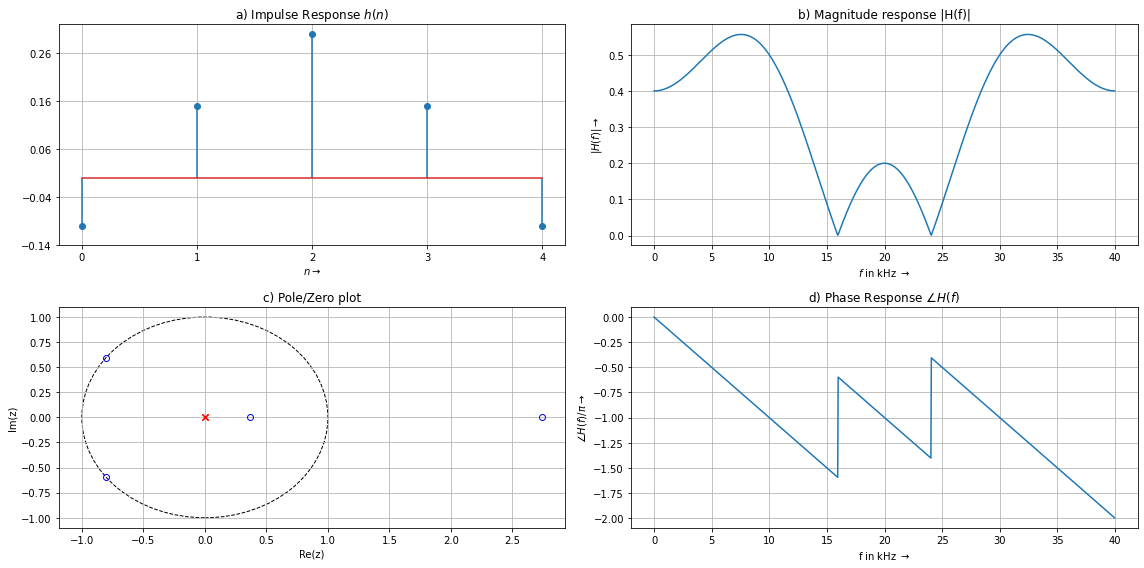

In [3]:
magphasresponse()